# Testing Algorithms

In [602]:
import pandas as pd
import numpy as np
import math
import os
import datetime
import matplotlib.pyplot as plt
import scipy.stats as sp
from imblearn.over_sampling import SMOTE 
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 200)

TEST = True

## Retrieve the datasets

In [553]:
test_data = pd.read_csv("./encoded_test.csv", na_values= ['?', 'NA', ''],sep= ',')
train_data = pd.read_csv("./encoded_train.csv",na_values= ['?', 'NA', ''],sep=  ',')


## Build Prediction
This function builds the csv for submiting in kaggle

In [596]:
def build_prediction(pred):
    if TEST:
        
        pred = pd.DataFrame(pred, columns=['Predicted','col'])
        pred.drop('col', axis=1, inplace=True)
        loan_id = pd.DataFrame(test_data, columns=['loan_id'])

        results = pd.concat([loan_id, pred], axis=1)
        results = results.rename(
                columns={'loan_id': 'Id'})

        results.to_csv('results.csv', index = False)
       
        return results
    else:
        report = classification_report(y_test, pred, output_dict=True,zero_division= 0)

        print(f"Report:\n{classification_report(y_test, pred,zero_division= 0)}\n")

        sb.set(font_scale=1.0)
        
        ax = plt.subplot()
        cm = confusion_matrix(y_test, pred)

        sb.heatmap(cm, annot=True, ax=ax, fmt="g")

        ax.set_xlabel('Predicted');
        ax.set_ylabel('Observed');
        ax.set_title('Confusion Matrix');
        plt.show()


In [601]:
inputs = train_data.drop(columns=['loan_id', 'status'])
labels = train_data['status'].values
oversample = SMOTE(sampling_strategy='minority', random_state=1)

if (TEST):
    
    X_train = train_data.drop(columns=['loan_id', 'status'])
    y_train = train_data['status'].values

    X_train, y_train = oversample.fit_resample(inputs, labels)

    X_test = test_data.drop(columns=['loan_id', 'status'])
    y_test = test_data['status'].values
else:
    inputs, labels = oversample.fit_resample(inputs, labels)
    (X_train, X_test, y_train, y_test) = train_test_split(inputs, labels, test_size=0.25, random_state=1)



## Decision Tree

Report:
              precision    recall  f1-score   support

          -1       0.88      0.91      0.89        74
           1       0.89      0.87      0.88        67

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141




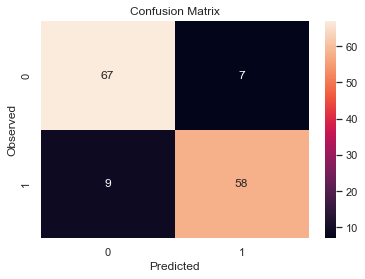

In [556]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

pred= decision_tree_classifier.predict_proba(X_test) if TEST else decision_tree_classifier.predict(X_test)
build_prediction(pred)


In [557]:
# parameter_grid = {'criterion': ['gini', 'entropy'],
#                   'splitter': ['best', 'random'],
#                   'max_depth': range(10, 20),
#                   'max_features': range(10,20)}

# grid_search = GridSearchCV(DecisionTreeClassifier(),
#                            param_grid=parameter_grid,
#                            cv=10,
#                            verbose=4,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)
# print('Best score: {}'.format(grid_search.best_score_))
# print('Best parameters: {}'.format(grid_search.best_params_))
# print('Best estimator: {}'.format(grid_search.best_estimator_))

In [558]:
# decision_tree_classifier = grid_search.best_estimator_

# pred= decision_tree_classifier.predict_proba(X_test) if TEST else decision_tree_classifier.predict(X_test)
# build_prediction(pred)

## SVC 

Report:
              precision    recall  f1-score   support

          -1       0.57      0.73      0.64        74
           1       0.57      0.39      0.46        67

    accuracy                           0.57       141
   macro avg       0.57      0.56      0.55       141
weighted avg       0.57      0.57      0.55       141




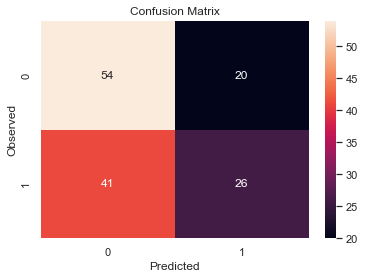

In [559]:

svc = SVC(probability=True)
svc.fit(X_train, y_train)

pred= svc.predict_proba(X_test) if TEST else svc.predict(X_test)
results=build_prediction(pred)

     

## Random Forest

Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99        74
           1       0.99      1.00      0.99        67

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141




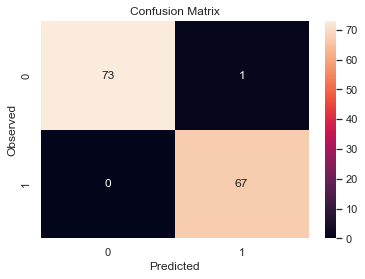

In [572]:
rf = RandomForestClassifier(400)

rf.fit(X_train, y_train)
pred= rf.predict_proba(X_test) if TEST else rf.predict(X_test)
build_prediction(pred)

## Gaussian Naive Bayes

Report:
              precision    recall  f1-score   support

          -1       0.65      0.96      0.77        74
           1       0.90      0.42      0.57        67

    accuracy                           0.70       141
   macro avg       0.77      0.69      0.67       141
weighted avg       0.77      0.70      0.68       141




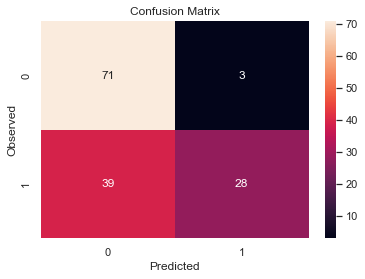

In [564]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

## Stochastic gradient descent

Report:
              precision    recall  f1-score   support

          -1       0.65      0.96      0.77        74
           1       0.90      0.42      0.57        67

    accuracy                           0.70       141
   macro avg       0.77      0.69      0.67       141
weighted avg       0.77      0.70      0.68       141




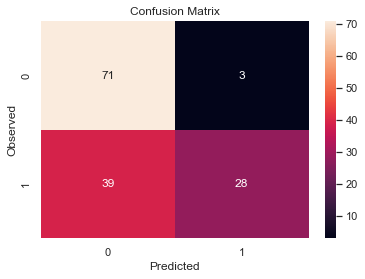

In [565]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf.fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

## Multi-layer Perceptron classifier

Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96        74
           1       1.00      0.91      0.95        67

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141




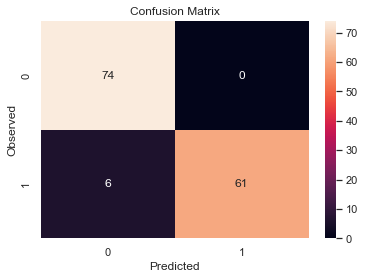

In [586]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

In [583]:
parameter_space = {
    'hidden_layer_sizes': [5,7,13,17,21,29],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate': ['constant','adaptive']}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(clf, param_grid=parameter_space, cv=cross_validation)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))
#Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 29, 'learning_rate': 'constant', 'solver': 'adam'}
clf = grid_search.best_estimator_
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)

Best score: 0.9480620155038759
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 29, 'learning_rate': 'constant', 'solver': 'adam'}
Best estimator: MLPClassifier(hidden_layer_sizes=29, max_iter=300, random_state=1)


In [604]:
clf = MLPClassifier(random_state=1, max_iter=300,activation= 'relu', hidden_layer_sizes=29, learning_rate= 'constant', solver= 'adam').fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)

,Id,Predicted
0,5895,0.0
1,5172,0.0
2,6207,0.0
3,7122,1.0
4,7067,0.0
...,...,...
349,7294,0.0
350,6321,0.0
351,6469,0.0
352,5614,0.0


## Gradient Boosting Classifier

Report:
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94        74
           1       0.94      0.93      0.93        67

    accuracy                           0.94       141
   macro avg       0.94      0.94      0.94       141
weighted avg       0.94      0.94      0.94       141




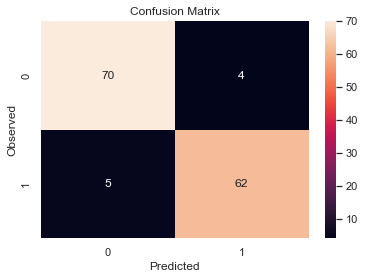

In [567]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
pred= clf.predict_proba(X_test) if TEST else clf.predict(X_test)
build_prediction(pred)